# Análisis Planilla del Meduca
> Puntos a evaluar:
- Fecha de ingreso a la institución
- Salarios de los funcionarios
    - Detección de anomalías
    - Tendencia salarial en la institución
- Cédulas repetidas en la planilla

## Importar librerías y crear el dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path().resolve().parent / 'analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx'
DATA_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/data-portfolio/analisis-planillas-gobierno/datasets/MEDUCA-10-2023.xlsx')

In [3]:
meduca = pd.read_excel(DATA_PATH, skiprows=4)
meduca.head(2)

Nombre  Apellido         Cédula  \
0  AARON    ABREGO  8-0778-000967   
1  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   

                      Estado Fecha de inicio  
0  INTERINO HASTA FIN DE AÑO      26/04/2023  
1                 PERMANENTE      20/02/2019

In [4]:
meduca.columns

Index(['Nombre', 'Apellido', 'Cédula', 'Cargo', 'Salario', 'Gasto', 'Estado',
       'Fecha de inicio'],
      dtype='object')

## Análisis fechas de ingreso - Funcionarios Meduca

In [5]:
meduca_fechas = meduca.copy()
meduca_fechas['Fecha de inicio'] = pd.to_datetime(meduca_fechas['Fecha de inicio'])
meduca_fechas.head(2)

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_66517/937151781.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_fechas['Fecha de inicio'] = pd.to_datetime(meduca_fechas['Fecha de inicio'])


Nombre  Apellido         Cédula  \
0  AARON    ABREGO  8-0778-000967   
1  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...  1692.60      0   
1  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1827.26      0   

                      Estado Fecha de inicio  
0  INTERINO HASTA FIN DE AÑO      2023-04-26  
1                 PERMANENTE      2019-02-20

In [6]:
meduca_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           60000 non-null  object        
 1   Apellido         60000 non-null  object        
 2   Cédula           60000 non-null  object        
 3   Cargo            60000 non-null  object        
 4   Salario          60000 non-null  float64       
 5   Gasto            60000 non-null  int64         
 6   Estado           60000 non-null  object        
 7   Fecha de inicio  60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [7]:
meduca_fechas.rename(columns={'Fecha de inicio': 'fecha'},inplace=True)
meduca_fechas.columns

Index(['Nombre', 'Apellido', 'Cédula', 'Cargo', 'Salario', 'Gasto', 'Estado',
       'fecha'],
      dtype='object')

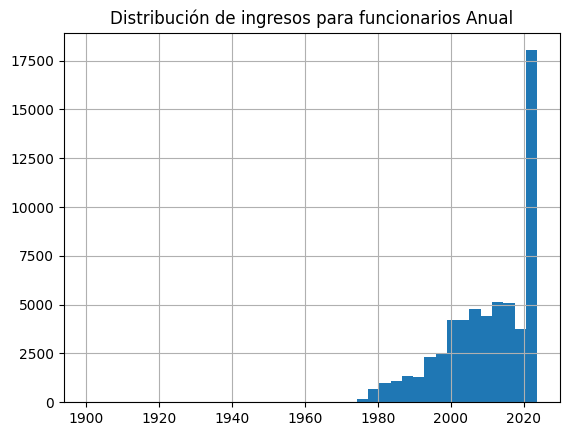

In [8]:
ax = meduca_fechas['fecha'].hist(bins=40)
plt.title('Distribución de ingresos para funcionarios Anual')
plt.show()

<Axes: >

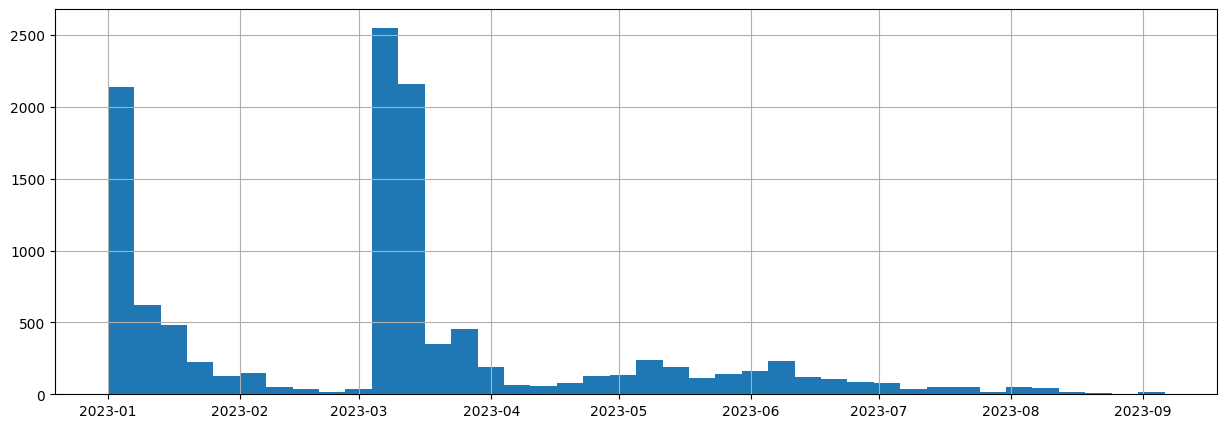

In [56]:
len(meduca_fechas[meduca_fechas['fecha'].dt.year >=2023])
meduca_fechas['fecha'][meduca_fechas['fecha'].dt.year ==2023].hist(bins=40, figsize=(15,5))

In [55]:
meduca_fechas[meduca_fechas['fecha'].dt.year >=2023].describe()
# meduca_fechas['fecha'][meduca_fechas['fecha'].dt.year ==2023].hist(bins=40, figsize=(15,5))

Salario         Gasto                          fecha
count  11801.000000  11801.000000                          11801
mean    1040.772310      0.381324  2023-03-07 15:08:05.958817024
min      202.000000      0.000000            2023-01-01 00:00:00
25%      600.000000      0.000000            2023-01-17 00:00:00
50%      800.000000      0.000000            2023-03-08 00:00:00
75%     1692.600000      0.000000            2023-03-20 00:00:00
max     5000.000000   3000.000000            2023-09-06 00:00:00
std      590.595614     29.290023                            NaN

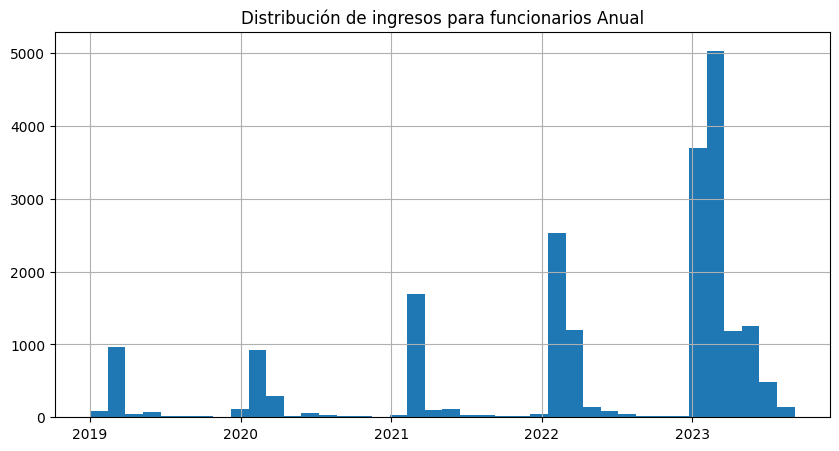

In [46]:
meduca_fechas = meduca_fechas[meduca_fechas['fecha'].dt.year >=2019]
ax = meduca_fechas['fecha'].hist(bins=40, figsize=(10,5))
plt.title('Distribución de ingresos para funcionarios Anual')
plt.show()

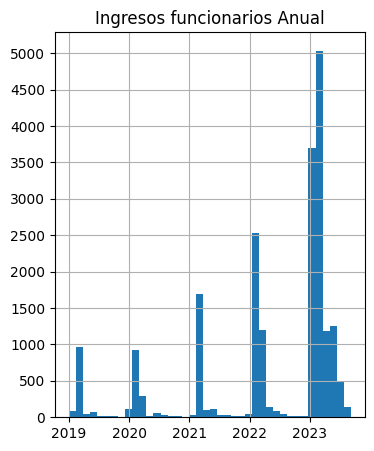

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Assuming 'meduca_fechas' is your DataFrame with a column 'fecha'
meduca_fechas = meduca_fechas[meduca_fechas['fecha'].dt.year >= 2019]

# Create a histogram
ax = meduca_fechas['fecha'].hist(bins=40, figsize=(4, 5))

# Set the y-axis step to every 1000
y_major_locator = MultipleLocator(500)
ax.yaxis.set_major_locator(y_major_locator)

# Add a title to the plot
plt.title('Ingresos funcionarios Anual')

# Show the plot
plt.show()


In [18]:
meduca_cantidad = meduca_fechas.copy()
meduca_cantidad = meduca_cantidad[meduca_cantidad['fecha'].dt.year >= 2019]
meduca_cantidad = meduca_cantidad.groupby(meduca_cantidad['fecha'].dt.year).size()
meduca_cantidad = pd.DataFrame(meduca_cantidad)
meduca_cantidad['year'] = meduca_cantidad.index
meduca_cantidad.reset_index(inplace=True, drop=True)
meduca_cantidad.rename(columns={0:'cantidad'}, inplace=True)
meduca_cantidad['delta'] = meduca_cantidad['cantidad'].pct_change() * 100
meduca_cantidad

cantidad  year       delta
0      1216  2019         NaN
1      1464  2020   20.394737
2      2042  2021   39.480874
3      4116  2022  101.567091
4     11801  2023  186.710398

posx and posy should be finite values
posx and posy should be finite values


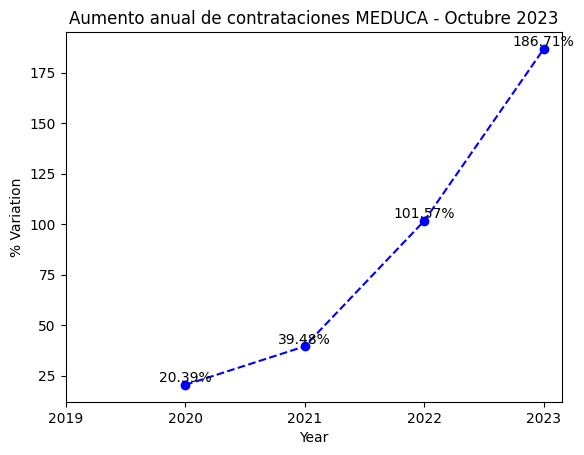

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set x-axis and y-axis data
x = meduca_cantidad['year']
y = meduca_cantidad['delta']

# Create the line chart with dots
plt.plot(x, y, marker='o', linestyle='--', color='blue')

# Add labels to the axes
plt.xlabel('Year')
plt.ylabel('% Variation')
plt.title('Aumento anual de contrataciones MEDUCA - Octubre 2023')

# Set the x-axis ticks and labels
plt.xticks(x)

# Add value labels above each dot
for i, j in zip(x, y):
    plt.text(i, j, f'{j:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()
